In [102]:
import numpy as np 
import pandas as pd
import warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [104]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from io import StringIO

In [106]:
df = pd.read_csv("data.csv")
df.sample(20)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
550,jazz.00081.au,117.453835,54,0.441978,0.043235,3027.203488,3302.632488,7278.664320,0.100148,-228.338621,67.538222,37.075586,21.315636,17.052656,10.145928,10.781308,8.009563,2.035948,0.292792,2.499510,3.847089,1.577272,2.827877,0.042121,-0.196999,2.316243,3.298528,4.046966,-0.187814,jazz
982,rock.00020.au,99.384014,47,0.398055,0.152507,2188.376105,2120.348371,4433.073194,0.117590,-56.912154,115.195759,-30.433732,37.195583,-21.980320,21.864517,-19.757451,14.993085,-24.064768,17.783128,-17.268301,6.744223,-10.743413,0.814011,-10.161297,3.680639,-8.554655,-0.911825,-2.523441,-1.976842,rock
831,reggae.00025.au,123.046875,58,0.362465,0.126800,1709.084136,1899.295438,3583.136667,0.073750,-177.330981,110.984237,-15.662017,36.783540,0.069497,24.470065,-3.770686,18.422625,-3.373046,13.778360,-2.108609,8.589011,-5.949765,2.897853,-5.276860,-3.058389,-6.198998,2.056390,-0.986980,2.303923,reggae
986,rock.00011.au,117.453835,55,0.343200,0.123424,1537.113369,2037.209163,3415.396014,0.054334,-169.698452,119.095780,7.189493,53.411739,4.154512,23.121278,-5.702519,24.984017,-9.315471,13.466156,-14.273665,5.946441,-13.591730,0.765030,-10.465509,0.074962,-4.373176,1.173224,0.490876,-5.829283,rock
735,pop.00005.au,172.265625,81,0.323285,0.139581,2289.822524,2435.758719,4746.421299,0.106781,-113.616520,90.029568,-5.535827,25.595577,2.616612,3.185809,1.134904,6.138381,2.802692,-1.865761,-7.130451,-3.441161,-5.912328,-4.343138,-4.946289,-4.376622,-3.313489,-5.441470,-0.570559,-2.177704,pop
443,hiphop.00077.au,117.453835,56,0.460818,0.238586,2986.420860,2899.970776,6403.194614,0.137662,-25.829126,70.940336,9.545730,17.479185,-1.631684,-0.546565,0.261462,-4.642850,-0.584515,-3.085220,-2.404871,0.387438,-2.156036,-0.343470,-2.377401,1.935800,1.314052,-1.278143,-2.017607,-0.198316,hiphop
181,classical.00075.au,117.453835,47,0.217421,0.016483,1171.718503,1466.931645,2235.903146,0.060885,-412.937821,138.533207,-19.267677,34.153224,8.963805,-4.296085,4.162109,0.886124,3.075768,0.107535,-4.061129,3.789274,5.924254,3.491833,6.626802,6.746299,2.471471,-1.881160,-0.062472,2.724356,classical
931,rock.00013.au,123.046875,55,0.440564,0.133781,1596.480260,2237.776843,3822.993550,0.046100,-211.269323,95.724506,40.655915,68.343779,5.332272,30.945223,-5.278796,22.817785,-1.594981,17.487664,-11.491320,8.734171,-10.442639,5.709571,-7.905526,3.721280,-6.618157,-1.277890,2.797973,6.279755,rock
391,disco.00010.au,107.666016,52,0.437595,0.232914,2877.595651,2624.071989,5865.939529,0.150324,-6.766103,61.124085,-16.660631,27.434711,7.720404,16.006456,4.633615,11.452742,0.341836,9.840641,3.188533,5.026611,-1.863555,1.480450,0.941627,-0.438530,-0.730471,4.445536,-1.841866,-0.603374,disco
800,reggae.00009.au,161.499023,76,0.383022,0.086670,1609.641458,1990.698833,3269.546896,0.060576,-232.624345,131.239400,2.697012,18.373700,11.351661,22.926809,-10.464260,16.754794,-15.247327,15.531519,-8.377222,8.026785,-3.776252,3.121093,-1.406352,3.261917,-4.098597,2.941136,0.381207,0.007293,reggae


In [108]:
y = df["label"]
X = df[['tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20']]

In [110]:
# llamalo X_scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.57427442, -0.50201802,  0.01965207, ...,  0.11859349,
        -1.3965024 ,  1.0464641 ],
       [-0.84497384, -0.92400011, -0.88433656, ..., -0.76122978,
         1.5040354 ,  0.12680789],
       [ 1.14546309,  1.25624067, -1.5330166 , ..., -3.16164499,
        -2.31676643, -3.20477931],
       ...,
       [-0.57427442, -0.85366976, -0.07129998, ..., -0.34896317,
        -0.62264404, -0.96275995],
       [-0.25649683, -0.85366976, -0.4186674 , ..., -0.62348331,
         0.03517241, -0.59971023],
       [-1.54162676, -1.48664289, -0.22728422, ..., -0.23386705,
        -0.53844052, -0.81501978]])

In [112]:
y.nunique()

10

In [114]:
from sklearn.cluster import KMeans


In [218]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [220]:
pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
pca_df['labels'] = y
pca_df.head()

,PC1,PC2,labels
0,4.026954,-0.608237,blues
1,-2.288697,-2.084000,blues
2,-0.304840,-4.848809,blues
3,-1.202617,-3.200435,blues
4,1.258426,-0.904788,blues


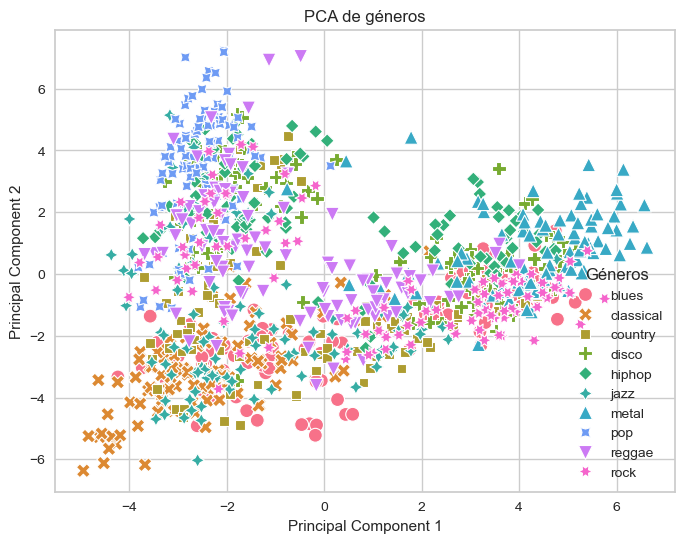

In [222]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='labels', style='labels', s=100)
plt.title('PCA de géneros')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Géneros')
plt.show()

### Kmeans

In [351]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [353]:
kmeans.labels_

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1,
       2, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0,

In [355]:
X_scaled

array([[-0.57427442, -0.50201802,  0.01965207, ...,  0.11859349,
        -1.3965024 ,  1.0464641 ],
       [-0.84497384, -0.92400011, -0.88433656, ..., -0.76122978,
         1.5040354 ,  0.12680789],
       [ 1.14546309,  1.25624067, -1.5330166 , ..., -3.16164499,
        -2.31676643, -3.20477931],
       ...,
       [-0.57427442, -0.85366976, -0.07129998, ..., -0.34896317,
        -0.62264404, -0.96275995],
       [-0.25649683, -0.85366976, -0.4186674 , ..., -0.62348331,
         0.03517241, -0.59971023],
       [-1.54162676, -1.48664289, -0.22728422, ..., -0.23386705,
        -0.53844052, -0.81501978]])

In [357]:
generos_clustered = pd.DataFrame(X_scaled, columns=X.columns)
generos_clustered

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,-0.574274,-0.502018,0.019652,1.787196,-0.118629,-0.543552,-0.238627,0.565253,1.173317,0.248491,-1.747268,0.278508,-1.663099,0.860355,-1.390401,0.490836,-0.972743,0.571284,-1.351740,1.469329,-1.463162,1.154636,-0.474364,-0.178688,-0.629267,0.118593,-1.396502,1.046464
1,-0.844974,-0.924000,-0.884337,-0.265843,-1.461374,-1.415943,-1.525842,-1.076777,-0.892161,1.169299,0.563150,0.758653,0.805941,-0.057401,1.055593,-0.931129,-0.784358,1.152194,1.638354,-1.001226,1.419693,0.707214,0.961067,-0.492742,-0.129524,-0.761230,1.504035,0.126808
2,1.145463,1.256241,-1.533017,0.314416,-1.216820,-0.511175,-1.061974,-1.450966,-0.771802,0.360544,1.270186,-0.322359,0.363277,0.672027,-1.538612,0.191332,-2.337212,-1.523382,-2.991010,-2.607901,-1.273542,-0.719685,-0.695778,-1.706040,-2.355845,-3.161645,-2.316766,-3.204779
3,2.297073,2.381526,-1.339101,-0.180601,-1.174937,-1.282623,-1.163976,-0.825410,-0.626127,1.061653,-0.300544,1.482333,0.153272,-0.185575,0.635370,-1.114907,-1.315501,0.079184,0.523659,-0.757356,0.840183,0.164486,-0.270659,-2.332502,-1.160187,-0.867712,0.242447,-1.261258
4,1.481349,1.185910,0.151907,0.103572,-0.546054,-0.361597,-0.409085,-0.673412,-0.009536,0.104637,-0.165823,1.242622,0.279785,1.010346,0.086027,0.690222,-0.119546,0.945950,-0.134028,0.444688,-0.919806,-0.827251,-0.597980,0.332796,-0.174447,-0.376584,0.627012,-0.237363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.121810,0.130955,0.491814,0.535047,0.153990,-0.345453,-0.027640,0.883693,1.028863,0.186830,-1.615169,1.068954,-1.413215,0.750895,-1.255790,1.007840,-1.383886,1.228323,-1.342967,1.017507,-1.517281,0.208231,-1.150978,0.477029,-0.930587,0.823807,-0.358256,0.242899
996,-0.075941,-0.080036,-0.525193,-0.567427,0.491924,-0.044611,0.350735,0.778124,0.230257,-0.320279,-1.133321,0.341065,-2.029211,0.709090,-1.523842,0.404877,-1.129820,1.173330,-1.604547,0.696745,-0.861700,0.485260,-1.124607,0.100881,-1.448020,0.144599,0.179531,2.252321
997,-0.574274,-0.853670,-0.071300,1.185246,-1.196170,-0.761891,-1.037138,-1.495642,0.165017,1.114172,0.458827,1.089399,0.055804,1.790932,-0.576780,0.598861,-0.366569,-0.142197,-0.099607,0.978873,-0.581751,0.065802,-0.506567,-0.032906,-0.298665,-0.348963,-0.622644,-0.962760
998,-0.256497,-0.853670,-0.418667,0.749926,-0.735546,-1.119873,-0.837454,-0.390854,0.460374,1.183392,-1.742222,0.610148,-1.308806,-0.348867,-0.948532,0.614143,-0.642770,-0.509290,-0.972243,-0.227249,-1.250355,-0.337571,0.635366,-1.496255,-1.025308,-0.623483,0.035172,-0.599710


In [359]:
generos_clustered['Cluster'] = kmeans.labels_
generos_clustered['labels'] = y

In [361]:
generos_clustered.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,Cluster,labels
0,-0.574274,-0.502018,0.019652,1.787196,-0.118629,-0.543552,-0.238627,0.565253,1.173317,0.248491,-1.747268,0.278508,-1.663099,0.860355,-1.390401,0.490836,-0.972743,0.571284,-1.351740,1.469329,-1.463162,1.154636,-0.474364,-0.178688,-0.629267,0.118593,-1.396502,1.046464,0,blues
1,-0.844974,-0.924000,-0.884337,-0.265843,-1.461374,-1.415943,-1.525842,-1.076777,-0.892161,1.169299,0.563150,0.758653,0.805941,-0.057401,1.055593,-0.931129,-0.784358,1.152194,1.638354,-1.001226,1.419693,0.707214,0.961067,-0.492742,-0.129524,-0.761230,1.504035,0.126808,2,blues
2,1.145463,1.256241,-1.533017,0.314416,-1.216820,-0.511175,-1.061974,-1.450966,-0.771802,0.360544,1.270186,-0.322359,0.363277,0.672027,-1.538612,0.191332,-2.337212,-1.523382,-2.991010,-2.607901,-1.273542,-0.719685,-0.695778,-1.706040,-2.355845,-3.161645,-2.316766,-3.204779,2,blues
3,2.297073,2.381526,-1.339101,-0.180601,-1.174937,-1.282623,-1.163976,-0.825410,-0.626127,1.061653,-0.300544,1.482333,0.153272,-0.185575,0.635370,-1.114907,-1.315501,0.079184,0.523659,-0.757356,0.840183,0.164486,-0.270659,-2.332502,-1.160187,-0.867712,0.242447,-1.261258,2,blues
4,1.481349,1.185910,0.151907,0.103572,-0.546054,-0.361597,-0.409085,-0.673412,-0.009536,0.104637,-0.165823,1.242622,0.279785,1.010346,0.086027,0.690222,-0.119546,0.945950,-0.134028,0.444688,-0.919806,-0.827251,-0.597980,0.332796,-0.174447,-0.376584,0.627012,-0.237363,0,blues


In [363]:
generos_clustered.sample(4)

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,Cluster,labels
968,-0.256497,-0.220697,-0.487800,-0.837785,-0.473477,-0.333267,-0.372702,-0.847744,-0.600351,0.237920,-0.058717,0.556316,0.342386,0.792048,-0.238444,0.950647,0.221104,0.128066,-0.598553,-0.015810,-0.349994,0.581988,-0.893138,-0.431695,-1.244911,-2.043852,-1.894394,-0.533206,2,rock
618,0.846898,0.482607,1.819680,0.981401,0.522926,-0.010696,0.309015,0.673234,1.005912,-0.536249,-0.956040,2.049505,-1.676488,1.397743,0.724055,1.795436,0.519843,1.535915,-0.135902,2.185968,-0.418530,1.221919,-2.052883,0.637487,-0.639857,-0.593840,1.009638,1.469308,0,metal
179,2.799057,2.733178,-1.432083,0.056918,-1.222073,-1.740896,-1.524243,-0.234002,-0.158075,2.062132,-1.843033,-2.082914,-0.527527,-1.458385,-0.598477,-1.639234,-0.135755,-0.818849,0.077084,-1.294613,-0.107011,-0.697349,0.159709,-0.533205,-0.468772,-0.371156,-0.457434,-0.120673,2,classical
226,-0.075941,0.060625,-0.338221,-0.327425,-0.590225,-0.392615,-0.443694,-0.591443,0.013826,0.713396,-0.203711,0.688810,-0.941872,0.737686,-0.589599,0.834881,-0.809982,1.035881,-0.782120,0.866032,-0.194558,0.189516,-1.111855,0.732153,-0.958106,1.038209,-0.986283,-0.327451,0,country


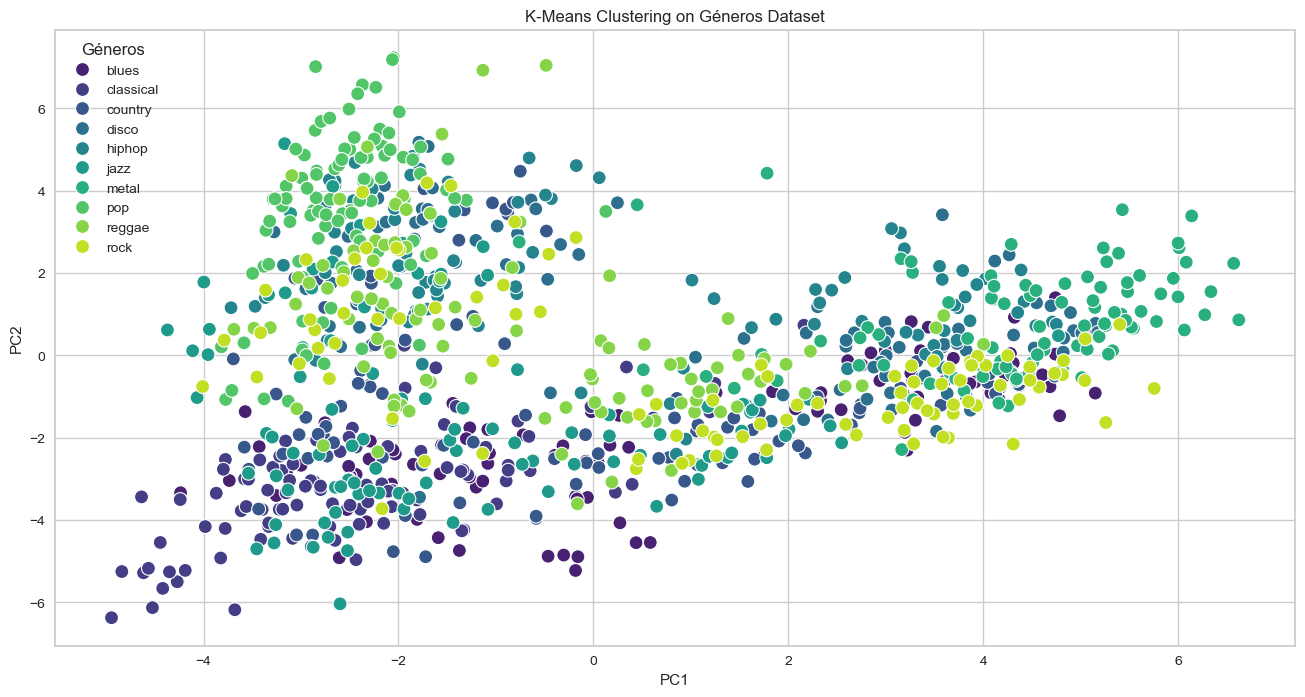

In [365]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='labels', palette='viridis', s=100)
plt.title('K-Means Clustering on Géneros Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Géneros')
plt.show()

In [367]:
pca_df['cluster'] = kmeans.labels_
pca_df.sample(6)

,PC1,PC2,labels,cluster
324,3.520388,-1.843579,disco,0
106,-2.865202,-3.067262,classical,2
295,-1.758171,-2.662883,country,2
51,-2.998770,-2.669368,blues,2
547,1.077078,-3.010024,jazz,2
480,2.278875,1.601104,hiphop,0


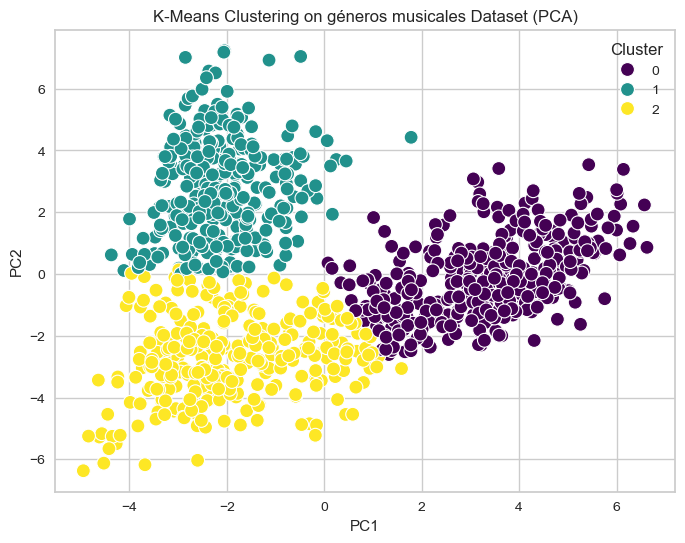

In [369]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis', s=100)
plt.title('K-Means Clustering on géneros musicales Dataset (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

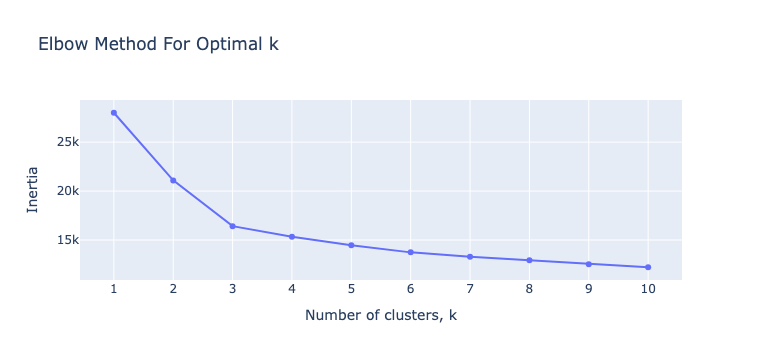

In [371]:
inertias = []
range_of_clusters = range(1, 11)

for k in range_of_clusters:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range_of_clusters), y=inertias, mode='lines+markers', name='Inertia'))
fig.update_layout(title='Elbow Method For Optimal k',
                  xaxis_title='Number of clusters, k',
                  yaxis_title='Inertia',
                  xaxis=dict(tickmode='array', tickvals=list(range_of_clusters)))
fig.show()

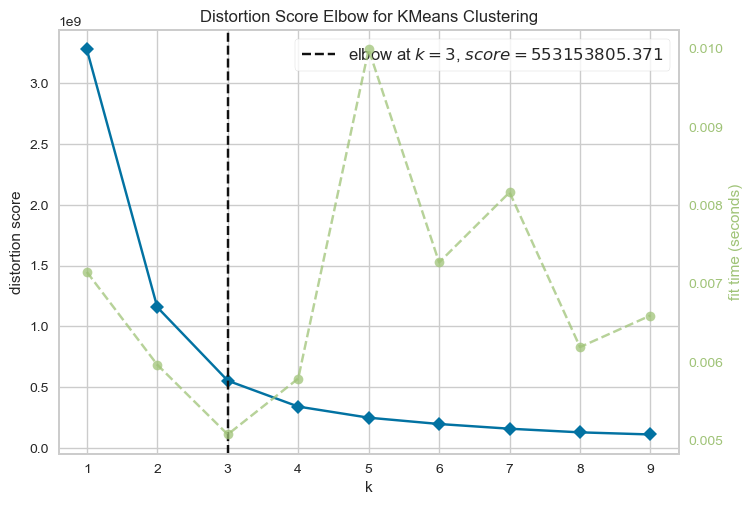

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [372]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X)        
visualizer.show()        

El gráfico del método del codo visualiza la inercia (suma de las distancias al cuadrado de las muestras hasta su centro de conglomerado más cercano) para varios números de conglomerados (k).
Estás buscando un punto en la curva donde la disminución de la inercia cambia de rápida a más gradual: el punto "codo".
Este punto sugiere que agregar más clústeres más allá de este número da como resultado rendimientos decrecientes en términos de obtener clústeres más compactos.
Por lo tanto, se considera un equilibrio óptimo entre el número de clústeres y la compacidad del agrupamiento, lo que indica una buena cantidad de clústeres para utilizar para K-Means

In [376]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.272


La puntuación de silueta es una métrica de la separación de los grupos.
Varía de -1 a 1, donde los valores negativos significan que los clústeres están mal asignados, 0 significa que los clústeres se superponen y 1 significa que los clústeres están separados y definidos.

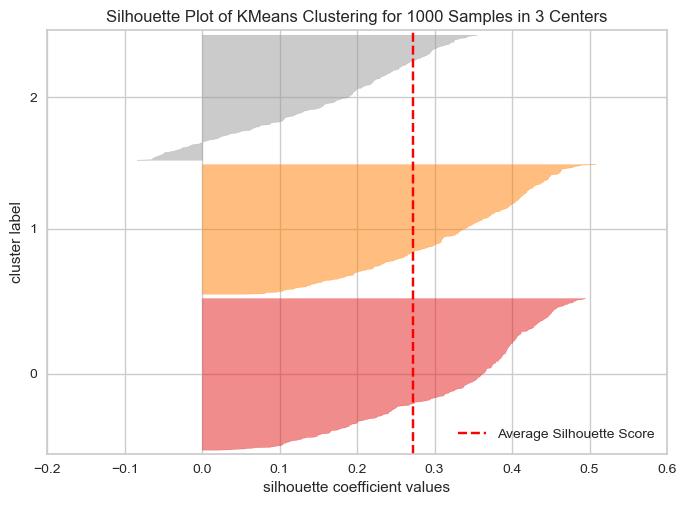

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [379]:
from yellowbrick.cluster import SilhouetteVisualizer

#
k = len(set(kmeans.labels_))
visualizer = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=42))
visualizer.fit(X_scaled)
visualizer.show()


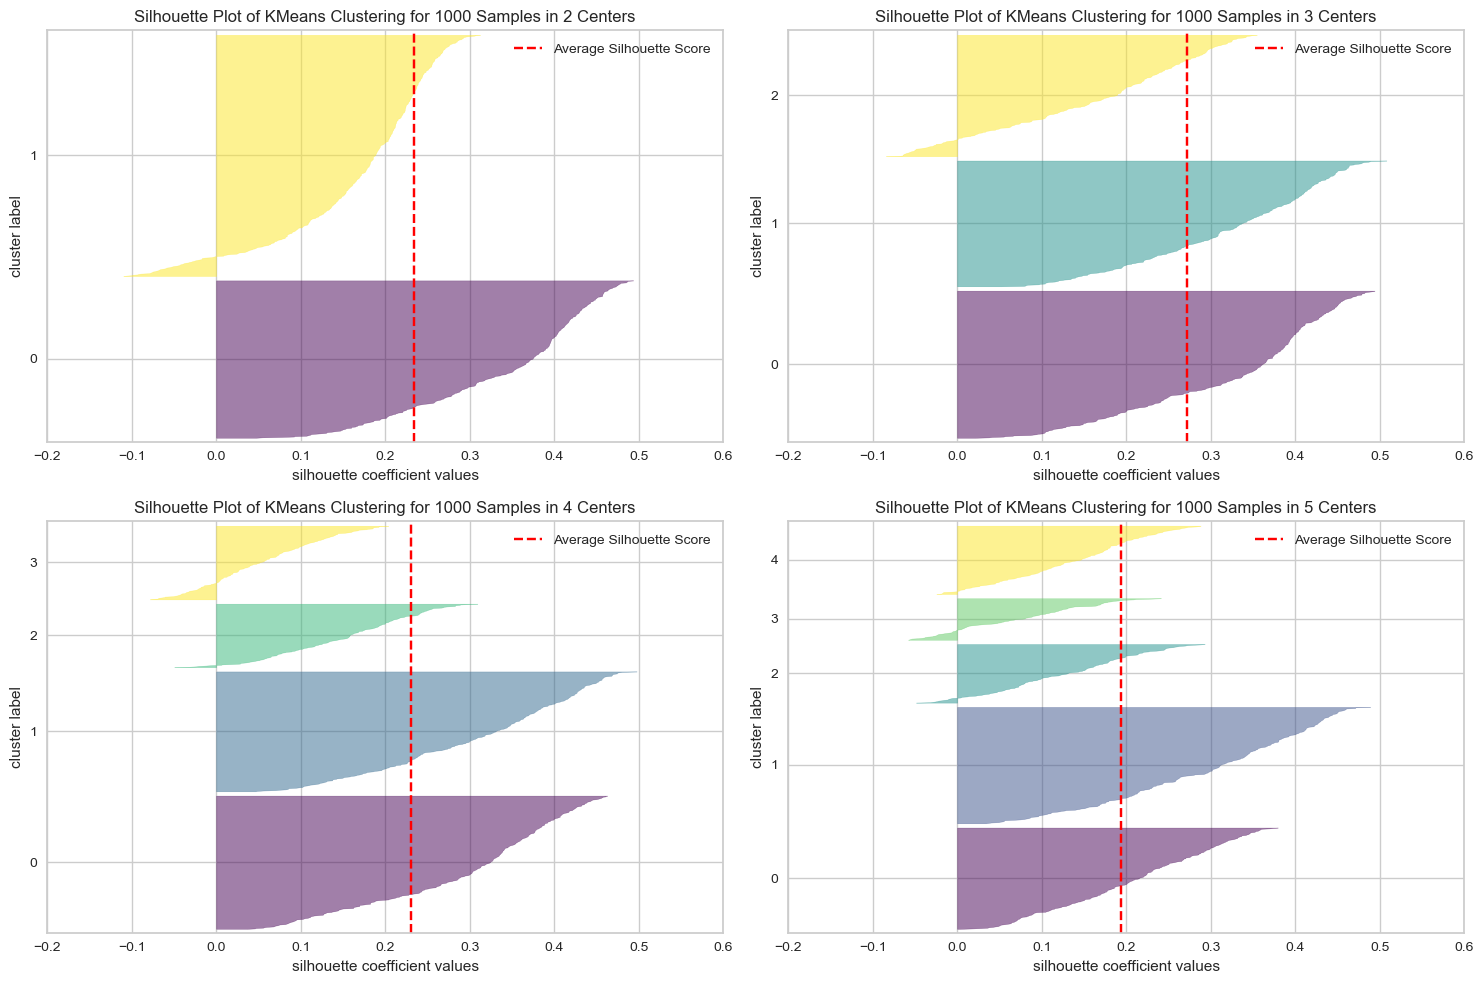

In [381]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Configurar subplots de 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
k_values = [2, 3, 4, 5]
palette = 'viridis'  # Puedes cambiar esto por otros esquemas de colores: 'coolwarm', 'plasma', 'cividis', etc.

# Iterar sobre los valores de k y los subplots
for ax, k in zip(axes.flatten(), k_values):
    visualizer = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=42), ax=ax, colors=palette)
    visualizer.fit(X_scaled)
    visualizer.finalize()  # Finalizar el visualizador para cada subplot

plt.tight_layout()
plt.show()

In [382]:
tableau_df = pd.read_csv("data.csv")
tableau_df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [385]:
tableau_df["tempo"].dtype

dtype('float64')